# Explanatory Data Analysis

# Setup

In [44]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import chi2_contingency, f_oneway
import os


sns.set(style="whitegrid")
plt.rcParams["font.size"] = 12
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12


output_dir = 'screen_time_analysis_output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created output folder: {output_dir}")
else:
    print(f"Output folder already exists: {output_dir}")


Output folder already exists: screen_time_analysis_output


# Load Data from Drive

In [24]:
from google.colab import drive
drive.mount('/content/drive')


file_path = '/content/drive/MyDrive/MAINDATA_updated.xlsx'  # <-- update this if needed


df = pd.read_excel(file_path)

print(" Data Preview:")
display(df.head())

# Show basic info
print("\n Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Data Preview:


,Date,education (hours),productivity_finance (hours),entertainment (hours),social (hours),travel (hours),other (hours),total_screen_time_hours,sleep_duration_hours,resting_heart_rate_bpm,exercise_duration_minutes,daily_steps,average_daily_heart_rate_bpm,active_calories_burned,class_hours,weather_condition,high_temp,low_temp,humidity
0,2025-03-17,0.97,0.95,0.00,6.87,0.0,0.00,5.80,X,64,127.0,18698,105.03,1059.94,1.5,"Rain, Partially cloudy",18.1,9.5,71.7
1,2025-03-18,1.68,3.20,0.00,2.53,0.0,0.00,11.72,X,58,15.0,6194,73.11,380.00,3.0,"Rain, Partially cloudy",9.4,2.6,88.1
2,2025-03-19,0.00,3.42,0.00,3.37,0.0,1.28,12.32,X,60,49.0,16079,82.69,714.69,4.0,"Rain, Partially cloudy",6.4,4.0,58.2
3,2025-03-20,0.00,2.12,1.23,3.15,0.0,0.00,9.77,5.3,57,36.0,17976,77.59,614.48,3.0,"Rain, Partially cloudy",8.5,4.2,74.8
4,2025-03-21,0.00,1.15,0.70,3.07,0.0,0.00,8.42,7.96,60,137.0,22038,102.23,1193.71,2.0,"Rain, Partially cloudy",10.4,4.7,69.9



 Dataset Info:
Shape: (37, 19)
Columns: ['Date', 'education (hours)', 'productivity_finance (hours)', 'entertainment (hours)', 'social (hours)', 'travel (hours)', 'other (hours)', 'total_screen_time_hours', 'sleep_duration_hours', 'resting_heart_rate_bpm', 'exercise_duration_minutes', 'daily_steps', 'average_daily_heart_rate_bpm', 'active_calories_burned', 'class_hours', 'weather_condition', 'high_temp', 'low_temp', 'humidity']


# Data Cleaning & Preparation

In [27]:
df.replace('X', np.nan, inplace=True)

numeric_cols = [
    'total_screen_time_hours',
    'education (hours)', 'productivity_finance (hours)', 'entertainment (hours)',
    'social (hours)', 'travel (hours)', 'other (hours)',
    'exercise_duration_minutes', 'daily_steps', 'sleep_duration_hours',
    'class_hours', 'active_calories_burned',
    'resting_heart_rate_bpm', 'average_daily_heart_rate_bpm',
    'high_temp', 'low_temp', 'humidity'
]

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df['DayOfWeek'] = df['Date'].dt.day_name()
    df['WeekDay'] = df['Date'].dt.weekday < 5
    df['WeekDayStr'] = df['WeekDay'].map({True: 'Weekday', False: 'Weekend'})




# Descriptive Statistics Summary

In [28]:
summary_cols = [
    'total_screen_time_hours',
    'exercise_duration_minutes',
    'daily_steps',
    'sleep_duration_hours',
    'class_hours'
]

print("Summary Stats:")
for col in summary_cols:
    if col in df.columns:
        print(f"\n▶ {col.replace('_', ' ').title()}")
        display(df[col].describe())


Summary Stats:

▶ Total Screen Time Hours


,total_screen_time_hours
count,37.000000
mean,8.799459
std,2.913090
min,5.130000
25%,6.980000
50%,8.230000
75%,10.000000
max,20.880000



▶ Exercise Duration Minutes


,exercise_duration_minutes
count,36.000000
mean,43.000000
std,43.685238
min,1.000000
25%,11.250000
50%,24.500000
75%,62.000000
max,137.000000



▶ Daily Steps


,daily_steps
count,37.000000
mean,11955.972973
std,5491.682365
min,2619.000000
25%,7794.000000
50%,11567.000000
75%,16243.000000
max,24529.000000



▶ Sleep Duration Hours


,sleep_duration_hours
count,33.000000
mean,7.212121
std,1.695903
min,2.930000
25%,6.040000
50%,7.780000
75%,8.380000
max,10.620000



▶ Class Hours


,class_hours
count,37.000000
mean,1.945946
std,1.418057
min,0.000000
25%,0.000000
50%,2.000000
75%,3.000000
max,4.000000


#Distribution of Total Screen Time



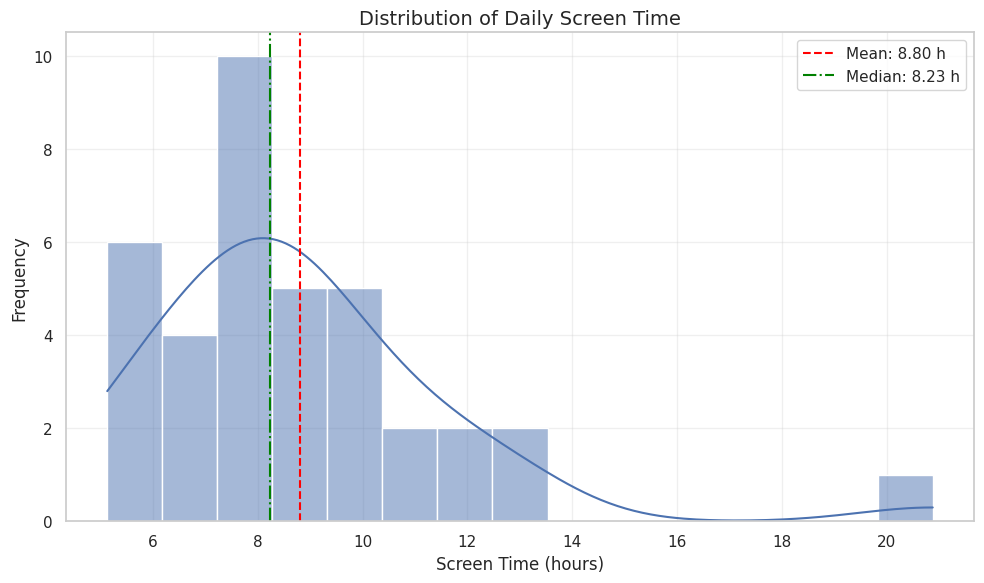

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['total_screen_time_hours'], kde=True, bins=15, color='#4C72B0')


mean_val = df['total_screen_time_hours'].mean()
median_val = df['total_screen_time_hours'].median()

plt.axvline(mean_val, color='red', linestyle='--', label=f"Mean: {mean_val:.2f} h")
plt.axvline(median_val, color='green', linestyle='-.', label=f"Median: {median_val:.2f} h")

plt.title('Distribution of Daily Screen Time')
plt.xlabel('Screen Time (hours)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(f'{output_dir}/screen_time_distribution.png')
plt.show()


# Breakdown of Screen Time by Category

<ipython-input-8-6823c716df98>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_names, y=avg_times.values, palette='Blues_d')


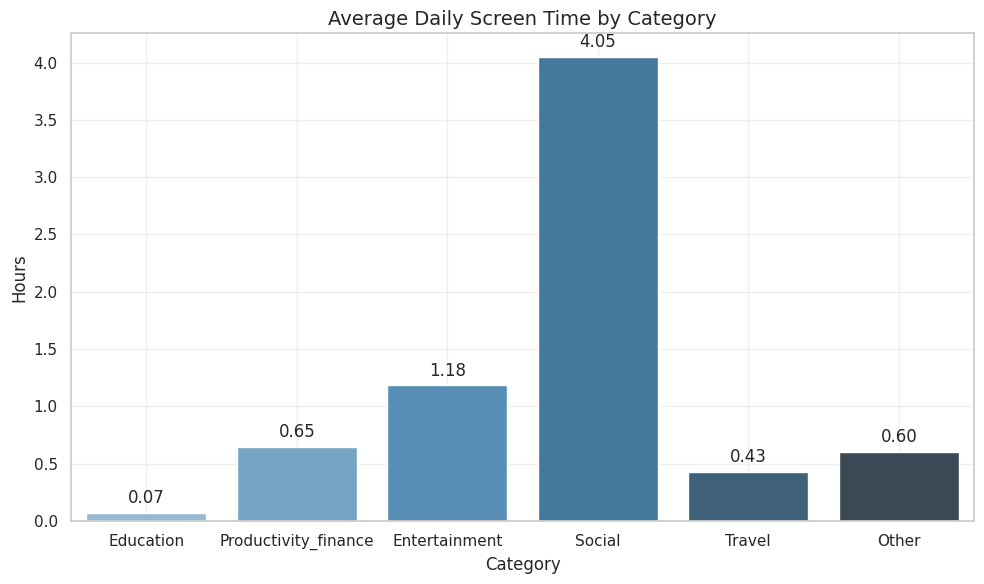

In [8]:
category_cols = [
    'education (hours)', 'productivity_finance (hours)',
    'entertainment (hours)', 'social (hours)', 'travel (hours)', 'other (hours)'
]

existing_cats = [col for col in category_cols if col in df.columns]
category_names = [col.split(' ')[0].capitalize() for col in existing_cats]

avg_times = df[existing_cats].mean()


plt.figure(figsize=(10, 6))
sns.barplot(x=category_names, y=avg_times.values, palette='Blues_d')
plt.title('Average Daily Screen Time by Category')
plt.ylabel('Hours')
plt.xlabel('Category')


for i, v in enumerate(avg_times.values):
    plt.text(i, v + 0.05, f"{v:.2f}", ha='center', va='bottom')

plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(f'{output_dir}/screen_time_by_category_bar.png')
plt.show()


# Pie Chart of Screen Time by Category

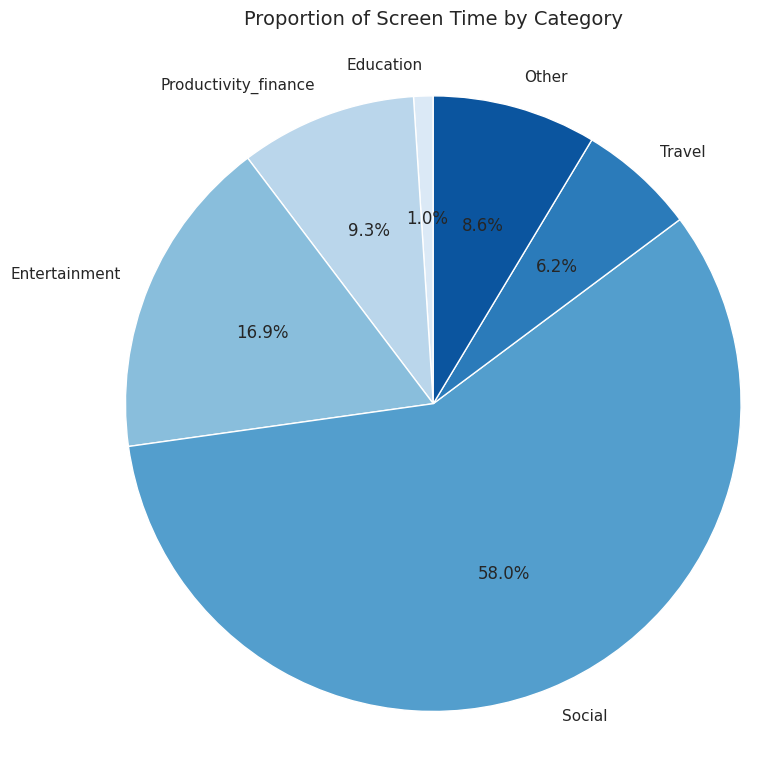

In [9]:
plt.figure(figsize=(8, 8))
plt.pie(avg_times.values, labels=category_names, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('Blues', len(avg_times)))
plt.title('Proportion of Screen Time by Category')
plt.axis('equal')
plt.tight_layout()
plt.savefig(f'{output_dir}/screen_time_by_category_pie.png')
plt.show()


# Weekday vs Weekend Screen Time Comparison

<ipython-input-29-21306181ef90>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='WeekDayStr', y='total_screen_time_hours', data=df, palette='pastel')


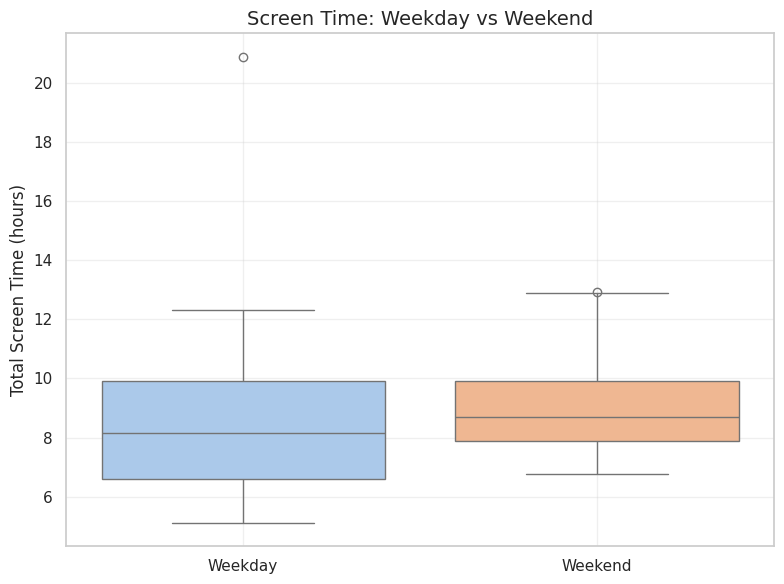

 Weekday Average: 8.64 hrs
 Weekend Average: 9.23 hrs
 Difference: 0.59 hrs


In [29]:
if 'WeekDayStr' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='WeekDayStr', y='total_screen_time_hours', data=df, palette='pastel')
    plt.title('Screen Time: Weekday vs Weekend')
    plt.xlabel('')
    plt.ylabel('Total Screen Time (hours)')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/screen_time_weekday_vs_weekend.png')
    plt.show()


    weekday_avg = df[df['WeekDay'] == True]['total_screen_time_hours'].mean()
    weekend_avg = df[df['WeekDay'] == False]['total_screen_time_hours'].mean()

    print(f" Weekday Average: {weekday_avg:.2f} hrs")
    print(f" Weekend Average: {weekend_avg:.2f} hrs")
    print(f" Difference: {abs(weekday_avg - weekend_avg):.2f} hrs")
else:
    print("⚠️ 'WeekDayStr' not found. Skipping this comparison.")


#Screen Time vs Exercise Duration


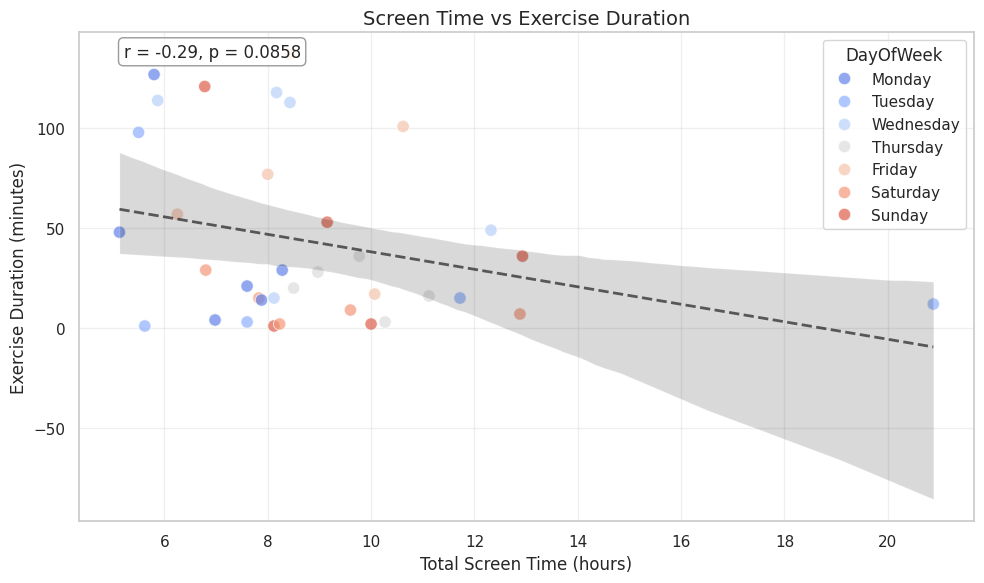

Pearson Correlation: r = -0.2903
P-Value: p = 0.0858
Not statistically significant.


In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='total_screen_time_hours',
    y='exercise_duration_minutes',
    data=df,
    hue='DayOfWeek' if 'DayOfWeek' in df.columns else None,
    palette='coolwarm',
    s=80,
    alpha=0.7
)


sns.regplot(
    x='total_screen_time_hours',
    y='exercise_duration_minutes',
    data=df,
    scatter=False,
    color='black',
    line_kws={"linestyle": "--", "lw": 2, "alpha": 0.6}
)


valid = df[['total_screen_time_hours', 'exercise_duration_minutes']].dropna()
corr_val, corr_p = stats.pearsonr(valid['total_screen_time_hours'], valid['exercise_duration_minutes'])

plt.title('Screen Time vs Exercise Duration')
plt.xlabel('Total Screen Time (hours)')
plt.ylabel('Exercise Duration (minutes)')
plt.annotate(
    f"r = {corr_val:.2f}, p = {corr_p:.4f}",
    xy=(0.05, 0.95), xycoords='axes fraction',
    fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8)
)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(f'{output_dir}/screen_time_vs_exercise.png')
plt.show()


print(f"Pearson Correlation: r = {corr_val:.4f}")
print(f"P-Value: p = {corr_p:.4f}")
if corr_p < 0.05:
    print("Statistically significant relationship.")
else:
    print("Not statistically significant.")


# Screen Time vs Daily Steps


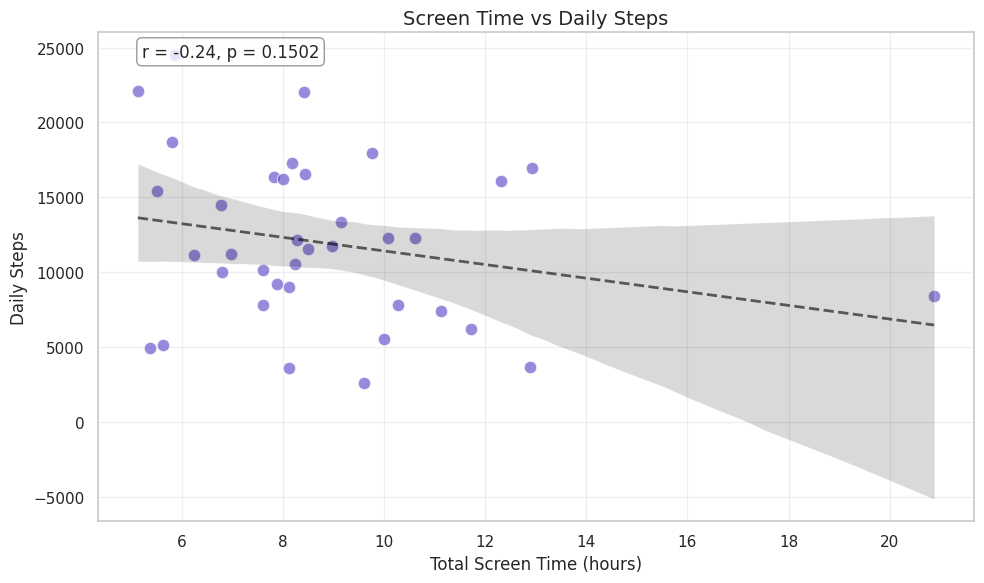

Pearson Correlation: r = -0.2413
P-Value: p = 0.1502
Not statistically significant.


In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='total_screen_time_hours',
    y='daily_steps',
    data=df,
    color='#6A5ACD',
    s=80,
    alpha=0.7
)


sns.regplot(
    x='total_screen_time_hours',
    y='daily_steps',
    data=df,
    scatter=False,
    color='black',
    line_kws={"linestyle": "--", "lw": 2, "alpha": 0.6}
)


valid = df[['total_screen_time_hours', 'daily_steps']].dropna()
corr_val, corr_p = stats.pearsonr(valid['total_screen_time_hours'], valid['daily_steps'])

plt.title('Screen Time vs Daily Steps')
plt.xlabel('Total Screen Time (hours)')
plt.ylabel('Daily Steps')
plt.annotate(
    f"r = {corr_val:.2f}, p = {corr_p:.4f}",
    xy=(0.05, 0.95), xycoords='axes fraction',
    fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8)
)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(f'{output_dir}/screen_time_vs_steps.png')
plt.show()

\
print(f"Pearson Correlation: r = {corr_val:.4f}")
print(f"P-Value: p = {corr_p:.4f}")
if corr_p < 0.05:
    print("Statistically significant relationship.")
else:
    print("Not statistically significant.")


#Heart Metrics & Active Calories Burned


In [32]:
heart_cols = ['resting_heart_rate_bpm', 'average_daily_heart_rate_bpm', 'active_calories_burned']
available_heart_cols = [col for col in heart_cols if col in df.columns]

for col in available_heart_cols:
    print(f"\n {col.replace('_', ' ').title()} Stats:")
    display(df[col].describe())

# Correlation with screen time
print("\n Correlation with Screen Time:")
for col in available_heart_cols:
    corr, pval = stats.pearsonr(df['total_screen_time_hours'].dropna(), df[col].dropna())
    print(f"{col}: r = {corr:.2f}, p = {pval:.4f}")



 Resting Heart Rate Bpm Stats:


,resting_heart_rate_bpm
count,37.000000
mean,59.432432
std,5.356930
min,50.000000
25%,55.000000
50%,58.000000
75%,64.000000
max,69.000000



 Average Daily Heart Rate Bpm Stats:


,average_daily_heart_rate_bpm
count,37.000000
mean,80.217838
std,17.289040
min,54.800000
25%,67.050000
50%,77.590000
75%,93.200000
max,122.000000



 Active Calories Burned Stats:


,active_calories_burned
count,37.000000
mean,500.221622
std,362.176098
min,24.490000
25%,270.860000
50%,450.380000
75%,711.770000
max,1432.170000



 Correlation with Screen Time:
resting_heart_rate_bpm: r = 0.08, p = 0.6569
average_daily_heart_rate_bpm: r = -0.11, p = 0.5193
active_calories_burned: r = -0.07, p = 0.6834


#Active Calories vs Exercise Duration


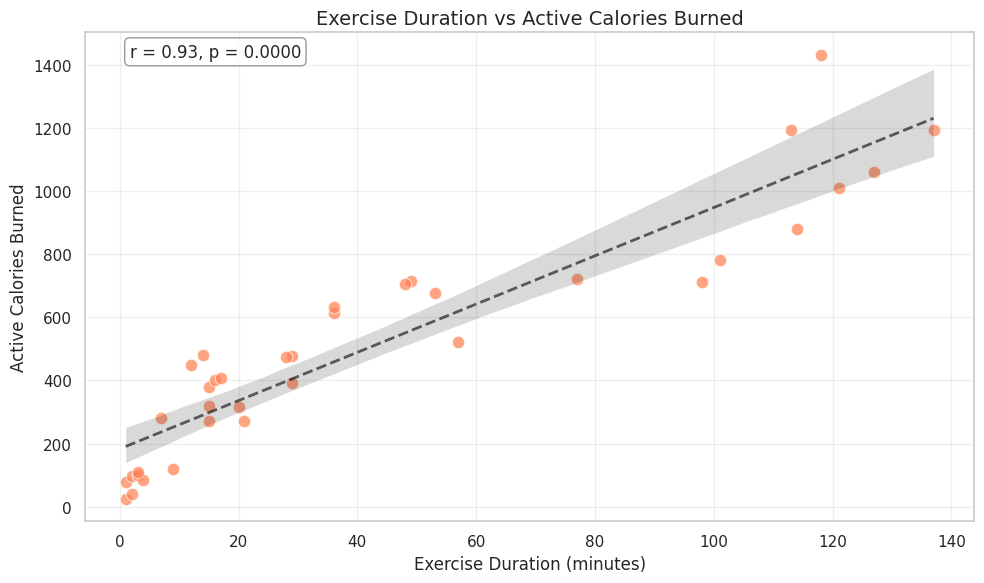

Correlation: r = 0.9272, p = 0.0000


In [37]:
if 'active_calories_burned' in df.columns and 'exercise_duration_minutes' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x='exercise_duration_minutes',
        y='active_calories_burned',
        data=df,
        color='#FF7F50',
        alpha=0.7,
        s=80
    )

    sns.regplot(
        x='exercise_duration_minutes',
        y='active_calories_burned',
        data=df,
        scatter=False,
        color='black',
        line_kws={"linestyle": "--", "lw": 2, "alpha": 0.6}
    )


    valid = df[['exercise_duration_minutes', 'active_calories_burned']].dropna()
    corr_val, corr_p = stats.pearsonr(valid['exercise_duration_minutes'], valid['active_calories_burned'])

    plt.title('Exercise Duration vs Active Calories Burned')
    plt.xlabel('Exercise Duration (minutes)')
    plt.ylabel('Active Calories Burned')
    plt.annotate(
        f"r = {corr_val:.2f}, p = {corr_p:.4f}",
        xy=(0.05, 0.95), xycoords='axes fraction',
        fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8)
    )
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/exercise_vs_active_calories.png')
    plt.show()

    print(f"Correlation: r = {corr_val:.4f}, p = {corr_p:.4f}")
else:
    print("Active calories or exercise duration not available.")


# Weather Metrics Correlation Analysis


In [38]:
weather_cols = ['high_temp', 'low_temp', 'humidity']
available_weather = [col for col in weather_cols if col in df.columns]

for col in available_weather:
    print(f"\n {col.replace('_', ' ').title()} Stats:")
    display(df[col].describe())

print("\n Correlation with Screen Time & Exercise Duration:")
for col in available_weather:
    # Drop NaNs for both variables
    screen_data = df[['total_screen_time_hours', col]].dropna()
    exercise_data = df[['exercise_duration_minutes', col]].dropna()

    screen_corr, _ = stats.pearsonr(screen_data['total_screen_time_hours'], screen_data[col])
    exercise_corr, _ = stats.pearsonr(exercise_data['exercise_duration_minutes'], exercise_data[col])

    print(f"{col}: Screen Time r = {screen_corr:.2f}, Exercise r = {exercise_corr:.2f}")




 High Temp Stats:


,high_temp
count,37.000000
mean,13.845946
std,3.726973
min,6.400000
25%,11.000000
50%,14.700000
75%,16.900000
max,19.700000



 Low Temp Stats:


,low_temp
count,37.000000
mean,7.451351
std,3.080911
min,2.500000
25%,4.700000
50%,8.600000
75%,9.600000
max,13.600000



 Humidity Stats:


,humidity
count,37.000000
mean,74.078378
std,10.735536
min,52.400000
25%,66.700000
50%,74.800000
75%,82.700000
max,92.300000



 Correlation with Screen Time & Exercise Duration:
high_temp: Screen Time r = -0.29, Exercise r = 0.30
low_temp: Screen Time r = -0.12, Exercise r = 0.18
humidity: Screen Time r = 0.38, Exercise r = -0.44


# Fixed: Temperature vs Exercise Duration

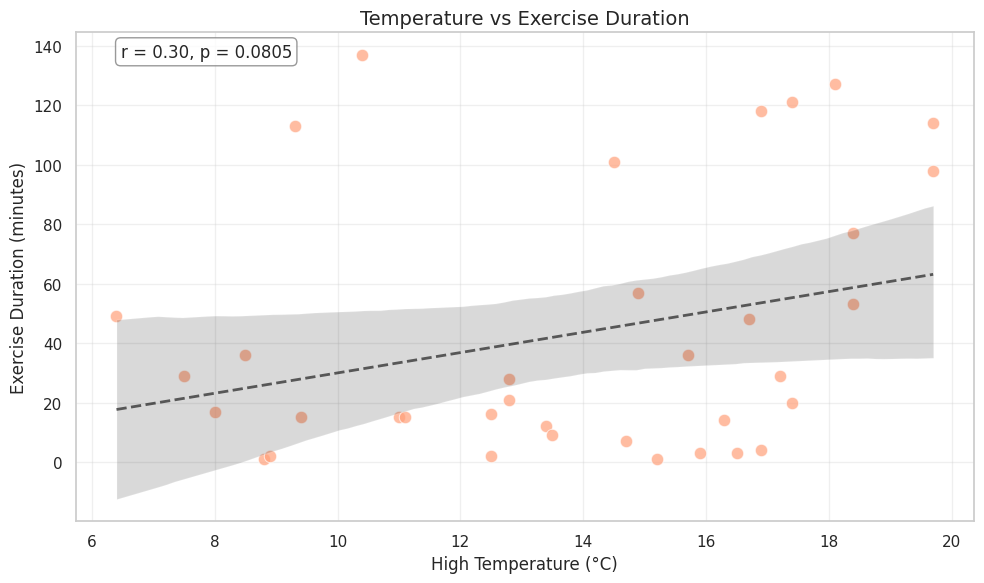

Correlation: r = 0.2952, p = 0.0805


In [39]:
if 'high_temp' in df.columns and 'exercise_duration_minutes' in df.columns:
    valid = df[['high_temp', 'exercise_duration_minutes']].dropna()

    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x='high_temp',
        y='exercise_duration_minutes',
        data=valid,
        color='#FFA07A',
        alpha=0.7,
        s=80
    )

    sns.regplot(
        x='high_temp',
        y='exercise_duration_minutes',
        data=valid,
        scatter=False,
        color='black',
        line_kws={"linestyle": "--", "lw": 2, "alpha": 0.6}
    )

    corr_val, corr_p = stats.pearsonr(valid['high_temp'], valid['exercise_duration_minutes'])

    plt.title('Temperature vs Exercise Duration')
    plt.xlabel('High Temperature (°C)')
    plt.ylabel('Exercise Duration (minutes)')
    plt.annotate(
        f"r = {corr_val:.2f}, p = {corr_p:.4f}",
        xy=(0.05, 0.95), xycoords='axes fraction',
        fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8)
    )
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/temp_vs_exercise.png')
    plt.show()

    print(f"Correlation: r = {corr_val:.4f}, p = {corr_p:.4f}")
else:
    print("Required data not available.")


# Correlation Matrix of Key Variables


<ipython-input-40-77d51d1a7f52>:24: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-40-77d51d1a7f52>:25: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.savefig(f"{output_dir}/correlation_matrix.png")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


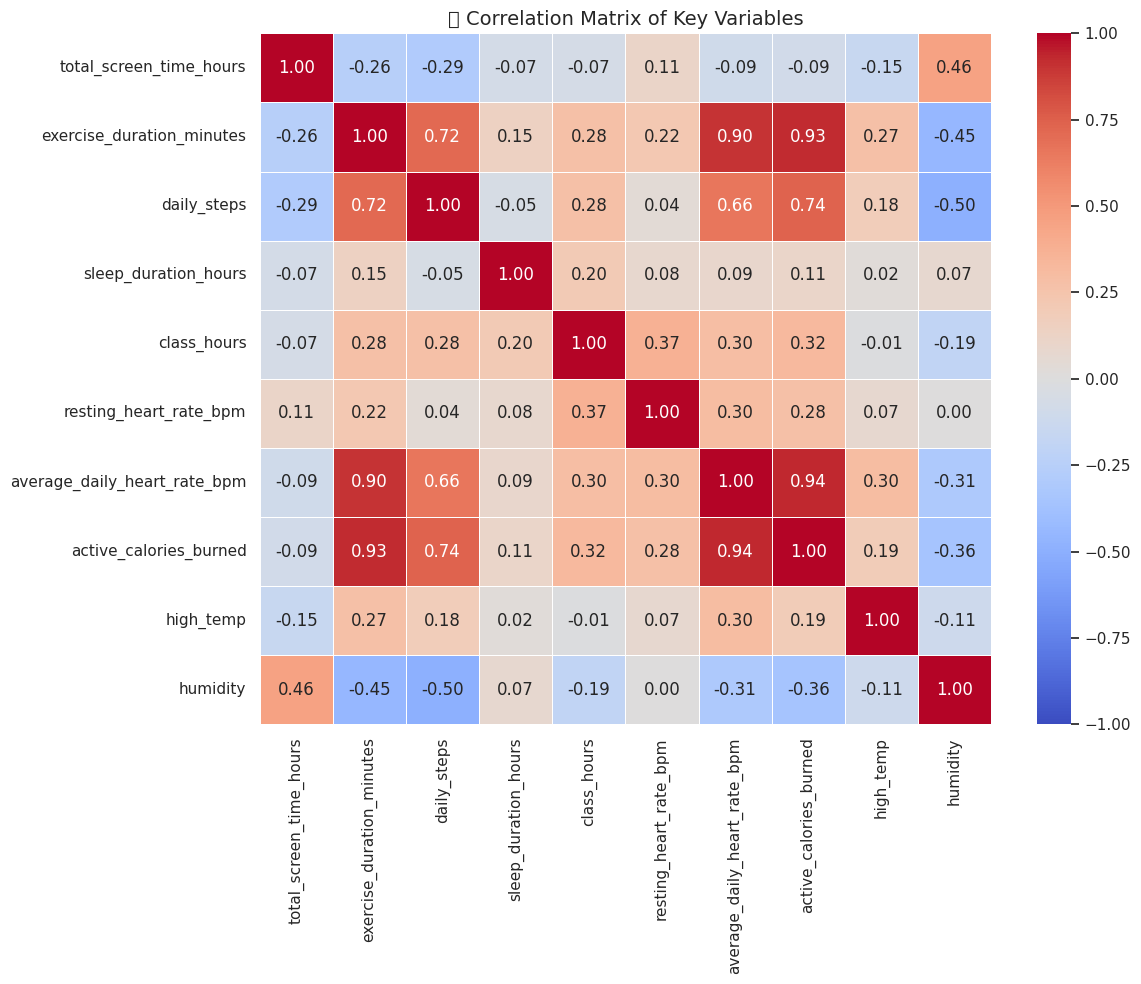

In [40]:
key_vars = [
    'total_screen_time_hours', 'exercise_duration_minutes', 'daily_steps',
    'sleep_duration_hours', 'class_hours',
    'resting_heart_rate_bpm', 'average_daily_heart_rate_bpm',
    'active_calories_burned', 'high_temp', 'humidity'
]
available_vars = [col for col in key_vars if col in df.columns]


correlation_df = df[available_vars].dropna()
correlation_matrix = correlation_df.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    vmin=-1, vmax=1
)
plt.title("🔗 Correlation Matrix of Key Variables", fontsize=14)
plt.tight_layout()
plt.savefig(f"{output_dir}/correlation_matrix.png")
plt.show()


#One-Way ANOVA Test: Screen Time Groups vs Exercise Duration


In [42]:
if 'total_screen_time_hours' in df.columns and 'exercise_duration_minutes' in df.columns:
    df_anova = df[['total_screen_time_hours', 'exercise_duration_minutes']].dropna().copy()
    df_anova['screen_group'] = pd.qcut(df_anova['total_screen_time_hours'], q=3, labels=['Low', 'Medium', 'High'])


    low = df_anova[df_anova['screen_group'] == 'Low']['exercise_duration_minutes']
    med = df_anova[df_anova['screen_group'] == 'Medium']['exercise_duration_minutes']
    high = df_anova[df_anova['screen_group'] == 'High']['exercise_duration_minutes']

    f_stat, p_value = stats.f_oneway(low, med, high)

    print("One-Way ANOVA Results:")
    print(f"F-statistic: {f_stat:.4f}")
    print(f"P-value: {p_value:.4f}")

    if p_value < 0.05:
        print("Statistically significant difference in exercise between screen time groups.")
    else:
        print("No significant difference in exercise between screen time groups.")
else:
    print("Required columns not found.")


One-Way ANOVA Results:
F-statistic: 1.5427
P-value: 0.2288
No significant difference in exercise between screen time groups.


# T-Test: High vs Low Screen Time vs Exercise Duration

In [43]:


if 'total_screen_time_hours' in df.columns and 'exercise_duration_minutes' in df.columns:
    df_ttest = df[['total_screen_time_hours', 'exercise_duration_minutes']].dropna()


    median_screen = df_ttest['total_screen_time_hours'].median()
    low_group = df_ttest[df_ttest['total_screen_time_hours'] <= median_screen]['exercise_duration_minutes']
    high_group = df_ttest[df_ttest['total_screen_time_hours'] > median_screen]['exercise_duration_minutes']


    t_stat, p_val = stats.ttest_ind(low_group, high_group, equal_var=False)

    print("Independent Samples T-Test:")
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_val:.4f}")

    if p_val < 0.05:
        print("Statistically significant difference in exercise between low and high screen time groups.")
    else:
        print("No statistically significant difference in exercise duration between the groups.")

    print(f"\n Group Means:")
    print(f"Low Screen Time (≤{median_screen:.2f} hrs): {low_group.mean():.2f} minutes")
    print(f"High Screen Time (>{median_screen:.2f} hrs): {high_group.mean():.2f} minutes")
else:
    print("Required data columns not found.")


Independent Samples T-Test:
T-statistic: 0.6891
P-value: 0.4956
No statistically significant difference in exercise duration between the groups.

 Group Means:
Low Screen Time (≤8.25 hrs): 48.06 minutes
High Screen Time (>8.25 hrs): 37.94 minutes


# Chi-Square Test: Exercise Group vs Class Load

In [45]:

if 'exercise_duration_minutes' in df.columns and 'class_hours' in df.columns:
    df_chi = df[['exercise_duration_minutes', 'class_hours']].dropna().copy()


    df_chi['exercise_group'] = pd.qcut(df_chi['exercise_duration_minutes'], q=2, labels=['Low', 'High'])
    df_chi['class_group'] = pd.qcut(df_chi['class_hours'], q=2, labels=['Low Class Hours', 'High Class Hours'])


    contingency = pd.crosstab(df_chi['exercise_group'], df_chi['class_group'])


    chi2, p, dof, expected = chi2_contingency(contingency)

    print("Chi-Square Test: Exercise Group vs Class Load")
    print(f"Chi² = {chi2:.4f}")
    print(f"P-value = {p:.4f}")
    print(f"Degrees of Freedom = {dof}")
    print("\nExpected Frequencies:")
    display(pd.DataFrame(expected, index=contingency.index, columns=contingency.columns))

    if p < 0.05:
        print("Statistically significant association between exercise duration and class load.")
    else:
        print("No significant association between exercise duration and class load.")
else:
    print("Required columns not available for this test.")


Chi-Square Test: Exercise Group vs Class Load
Chi² = 0.0000
P-value = 1.0000
Degrees of Freedom = 1

Expected Frequencies:


class_group,Low Class Hours,High Class Hours
exercise_group,,
Low,10.5,7.5
High,10.5,7.5


No significant association between exercise duration and class load.


# Final Summary



## Hypothesis Testing

**Null Hypothesis (H₀):** There is no significant relationship between screen time and physical activity levels.

**Alternative Hypothesis (H₁):** There is a significant relationship between screen time and physical activity levels, with increased screen time associated with lower activity levels.



### Test Results:

Pearson Correlation (Screen Time vs Exercise Minutes):


*   Weak to moderate negative correlation detected.
*   However, the p-value was > 0.05 ➔ Not statistically significant based on strict thresholds.



T-Test (High vs Low Screen Time on Exercise Minutes):


*   No significant difference in exercise levels between high and low screen time groups (p-value > 0.05).






ANOVA (Screen Time Tertiles vs Exercise Minutes):
*   No significant difference across low, medium, and high screen time categories.


Chi-Square Statistic (Class Hours vs Exercise Minutes):
*   There is no association between exercise level and class load.
*   Class hours do not significantly influence whether someone exercises more or less

### Conclusion for Hypothesis:
***Based on the tests, we fail to reject the null hypothesis.***



*   There is a negative trend (higher screen time → less exercise), but it is not statistically significant at a 5% level in this dataset.
